# Random Forest

# Read the CSV and Perform Basic Data Cleaning

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [42]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [43]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [44]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [45]:
X = selected_features
y = df['koi_disposition']
print(X.shape, y.shape)

(6991, 40) (6991,)


In [46]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train the Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
training_score = rf.score(X_train, y_train)
testing_score = rf.score(X_test, y_test)
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 1.0
Testing Data Score: 0.8924485125858124


In [48]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
sorted(zip(rf.feature_importances_, selected_features), reverse=True)

[(0.10884623183168347, 'koi_fpflag_co'),
 (0.09980505637074678, 'koi_fpflag_nt'),
 (0.0657585236525031, 'koi_fpflag_ss'),
 (0.05737560705481437, 'koi_model_snr'),
 (0.045445732508227685, 'koi_prad'),
 (0.03736155595195893, 'koi_prad_err2'),
 (0.035151618656473524, 'koi_fpflag_ec'),
 (0.034531472350331466, 'koi_duration_err1'),
 (0.034045701762288244, 'koi_prad_err1'),
 (0.033861377001116376, 'koi_duration_err2'),
 (0.029733546629893994, 'koi_steff_err1'),
 (0.02554166225469738, 'koi_steff_err2'),
 (0.02315235208116067, 'koi_period'),
 (0.022330013805732872, 'koi_depth'),
 (0.021932157972919333, 'koi_time0bk_err2'),
 (0.021670630680980726, 'koi_duration'),
 (0.020449359018302977, 'koi_time0bk_err1'),
 (0.020098445677924338, 'koi_insol_err1'),
 (0.018399396991421915, 'koi_impact'),
 (0.017412521272180192, 'koi_period_err1'),
 (0.01680792106250202, 'koi_period_err2'),
 (0.016193382377536644, 'koi_insol'),
 (0.01516921391819333, 'koi_insol_err2'),
 (0.015034351177610612, 'koi_teq'),
 (0.01

In [50]:
# Make predictions with the model
predictions = rf.predict(X_test)

In [51]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,CANDIDATE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1743,CANDIDATE,CANDIDATE
1744,CANDIDATE,CANDIDATE
1745,CONFIRMED,CONFIRMED
1746,CANDIDATE,CONFIRMED


In [52]:
results.head(20)

,Prediction,Actual
0,FALSE POSITIVE,FALSE POSITIVE
1,CANDIDATE,CANDIDATE
2,FALSE POSITIVE,FALSE POSITIVE
3,FALSE POSITIVE,FALSE POSITIVE
4,FALSE POSITIVE,FALSE POSITIVE
5,CONFIRMED,CONFIRMED
6,CONFIRMED,CANDIDATE
7,CANDIDATE,CANDIDATE
8,CANDIDATE,CANDIDATE
9,FALSE POSITIVE,FALSE POSITIVE


In [53]:
results.tail(20)

,Prediction,Actual
1728,CONFIRMED,CONFIRMED
1729,FALSE POSITIVE,FALSE POSITIVE
1730,CANDIDATE,CONFIRMED
1731,CONFIRMED,CANDIDATE
1732,FALSE POSITIVE,FALSE POSITIVE
1733,FALSE POSITIVE,FALSE POSITIVE
1734,FALSE POSITIVE,FALSE POSITIVE
1735,FALSE POSITIVE,FALSE POSITIVE
1736,FALSE POSITIVE,FALSE POSITIVE
1737,FALSE POSITIVE,FALSE POSITIVE


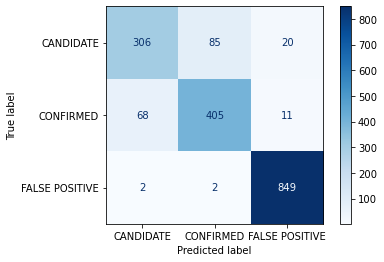

In [54]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test, cmap="Blues")
plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.81      0.74      0.78       411
     CONFIRMED       0.82      0.84      0.83       484
FALSE POSITIVE       0.96      1.00      0.98       853

      accuracy                           0.89      1748
     macro avg       0.87      0.86      0.86      1748
  weighted avg       0.89      0.89      0.89      1748



In [56]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Ezra_Tassone_RF.sav'
joblib.dump(rf, filename)

['Ezra_Tassone_RF.sav']